# Spectrum xAI

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import sys

from src.data.dataset import DAGMDataset
from src.models.models import DenseNetClassifier
from src.models.train_model import train_model
from src.models.evaluation import evaluate_model
from src.task.gradcam import show_gradcam
from src.task.gradient_shap import show_gradient_shap
from src.task.scorecam import show_scorecam
from src.task.integrated_gradient import show_integrated_gradient
from src.task.lime import show_lime
from src.task.saliency import show_saliency

import sys 
sys.dont_write_bytecode = True

c:\Users\ismoi\anaconda3\envs\ai\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


## Data Loading

In [2]:
CLASS = 1
IMAGE_PATH = f"data/dataset/Class{CLASS}/"

In [3]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Train", transform=transform)
test_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 575
Test dataset size: 575


## Model

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNetClassifier(pretrained=True, device=device)
criterion = torch.nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10

### Training

In [5]:
# train_accuracies, train_losses = train_model(model, train_loader, num_epochs, criterion, optimizer, device)
# model.save_model(f"data/models/densenet121_class{CLASS}.pt")

### Evaluation

In [6]:
model.load_model(f"data/models/model_densenet121_class{CLASS}.pth")
test_accuracy = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 100.00%


## Explanation

In [7]:
index = 1
image, label, label_image = test_dataset[index][0].unsqueeze(0), test_dataset[index][1], test_dataset[index][2].unsqueeze(0)
print(f'True Label: {label}')

True Label: 1


c:\Users\ismoi\anaconda3\envs\ai\Lib\site-packages\torch\nn\modules\module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


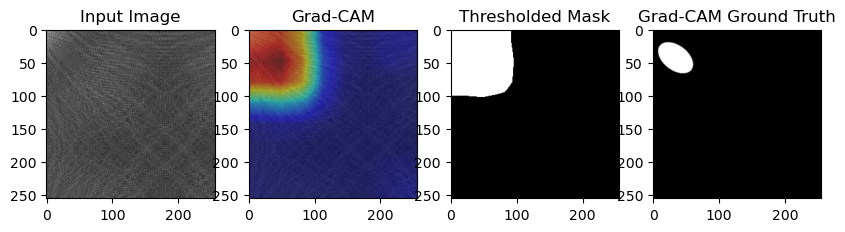

In [8]:
explanation, explanation_thresholded = show_gradcam(model.model, image, device, threshold=0.5)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[1].imshow(explanation, cmap='jet', alpha=0.5)
ax[1].set_title(f"Grad-CAM")

ax[2].imshow(explanation_thresholded, cmap='gray')
ax[2].set_title(f"Thresholded Mask")

ax[3].imshow(label_image.squeeze().permute(1, 2, 0))
ax[3].set_title(f"Grad-CAM Ground Truth")

plt.show()

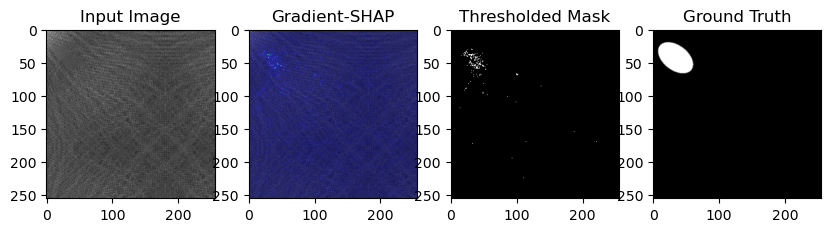

In [9]:
explanation, explanation_thresholded = show_gradient_shap(model.model, image, device, threshold=0.15, num_samples=100)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[1].imshow(explanation, cmap='jet', alpha=0.5)
ax[1].set_title(f"Gradient-SHAP")

ax[2].imshow(explanation_thresholded, cmap='gray')
ax[2].set_title(f"Thresholded Mask")

ax[3].imshow(label_image.squeeze().permute(1, 2, 0))
ax[3].set_title(f"Ground Truth")

plt.show()

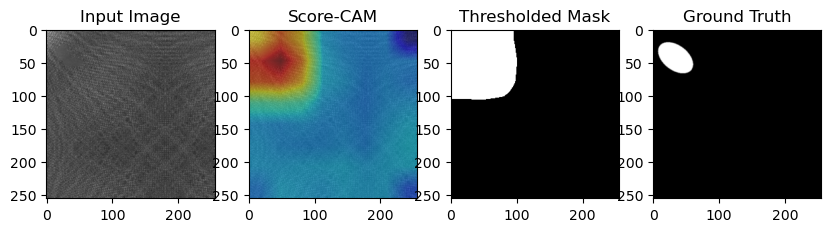

In [10]:
explanation, explanation_thresholded = show_scorecam(model.model, image, device, threshold=0.5)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[1].imshow(explanation, cmap='jet', alpha=0.5)
ax[1].set_title(f"Score-CAM")

ax[2].imshow(explanation_thresholded, cmap='gray')
ax[2].set_title(f"Thresholded Mask")

ax[3].imshow(label_image.squeeze().permute(1, 2, 0))
ax[3].set_title(f"Ground Truth")

plt.show()

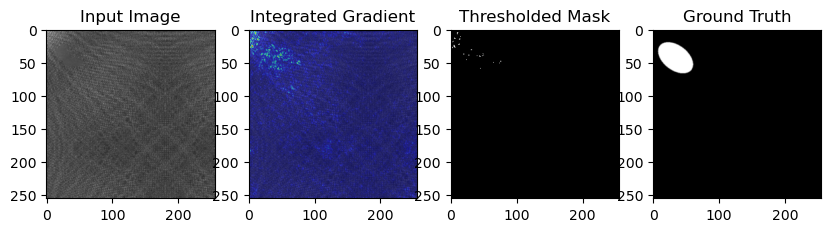

In [11]:
explanation, explanation_thresholded = show_integrated_gradient(model.model, image, device, n_steps=70)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[1].imshow(explanation, cmap='jet', alpha=0.5)
ax[1].set_title(f"Integrated Gradient")

ax[2].imshow(explanation_thresholded, cmap='gray')
ax[2].set_title(f"Thresholded Mask")

ax[3].imshow(label_image.squeeze().permute(1, 2, 0))
ax[3].set_title(f"Ground Truth")

plt.show()

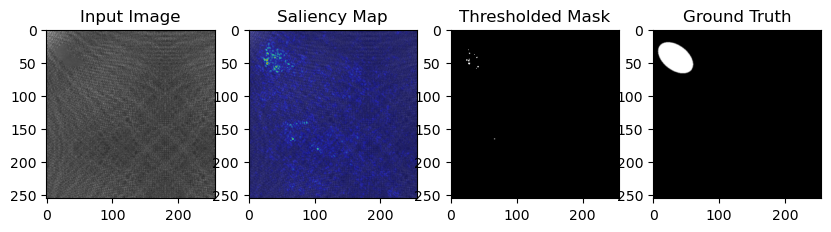

In [12]:
explanation, explanation_thresholded = show_saliency(model.model, image, device)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[1].imshow(explanation, cmap='jet', alpha=0.5)
ax[1].set_title(f"Saliency Map")

ax[2].imshow(explanation_thresholded, cmap='gray')
ax[2].set_title(f"Thresholded Mask")

ax[3].imshow(label_image.squeeze().permute(1, 2, 0))
ax[3].set_title(f"Ground Truth")

plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

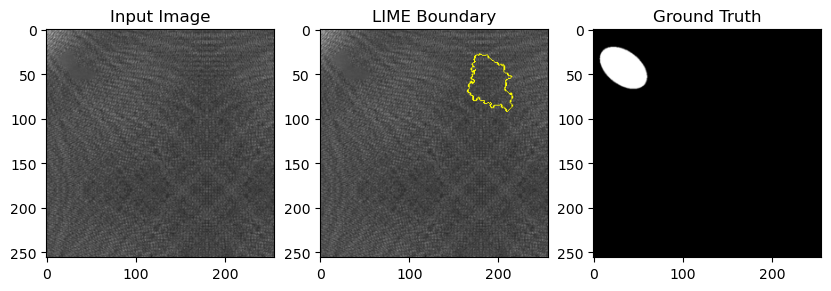

In [15]:
temp, mask = show_lime(model.model, image, device)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image.cpu().squeeze().permute(1, 2, 0))
ax[0].set_title("Input Image")

ax[1].imshow(mark_boundaries(temp, mask))
ax[1].set_title(f"LIME Boundary")

ax[2].imshow(label_image.squeeze().permute(1, 2, 0))
ax[2].set_title(f"Ground Truth")

plt.show()